In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your data
df = pd.read_csv("filteredCombinedData2_I0_80.csv")

# Select only the relevant columns you want to show in the plot
cols = ['Amp', 'L', 'L1', 'p1', 'L2', 'p2', 'tnextmax', 'l3max', 'p3max']

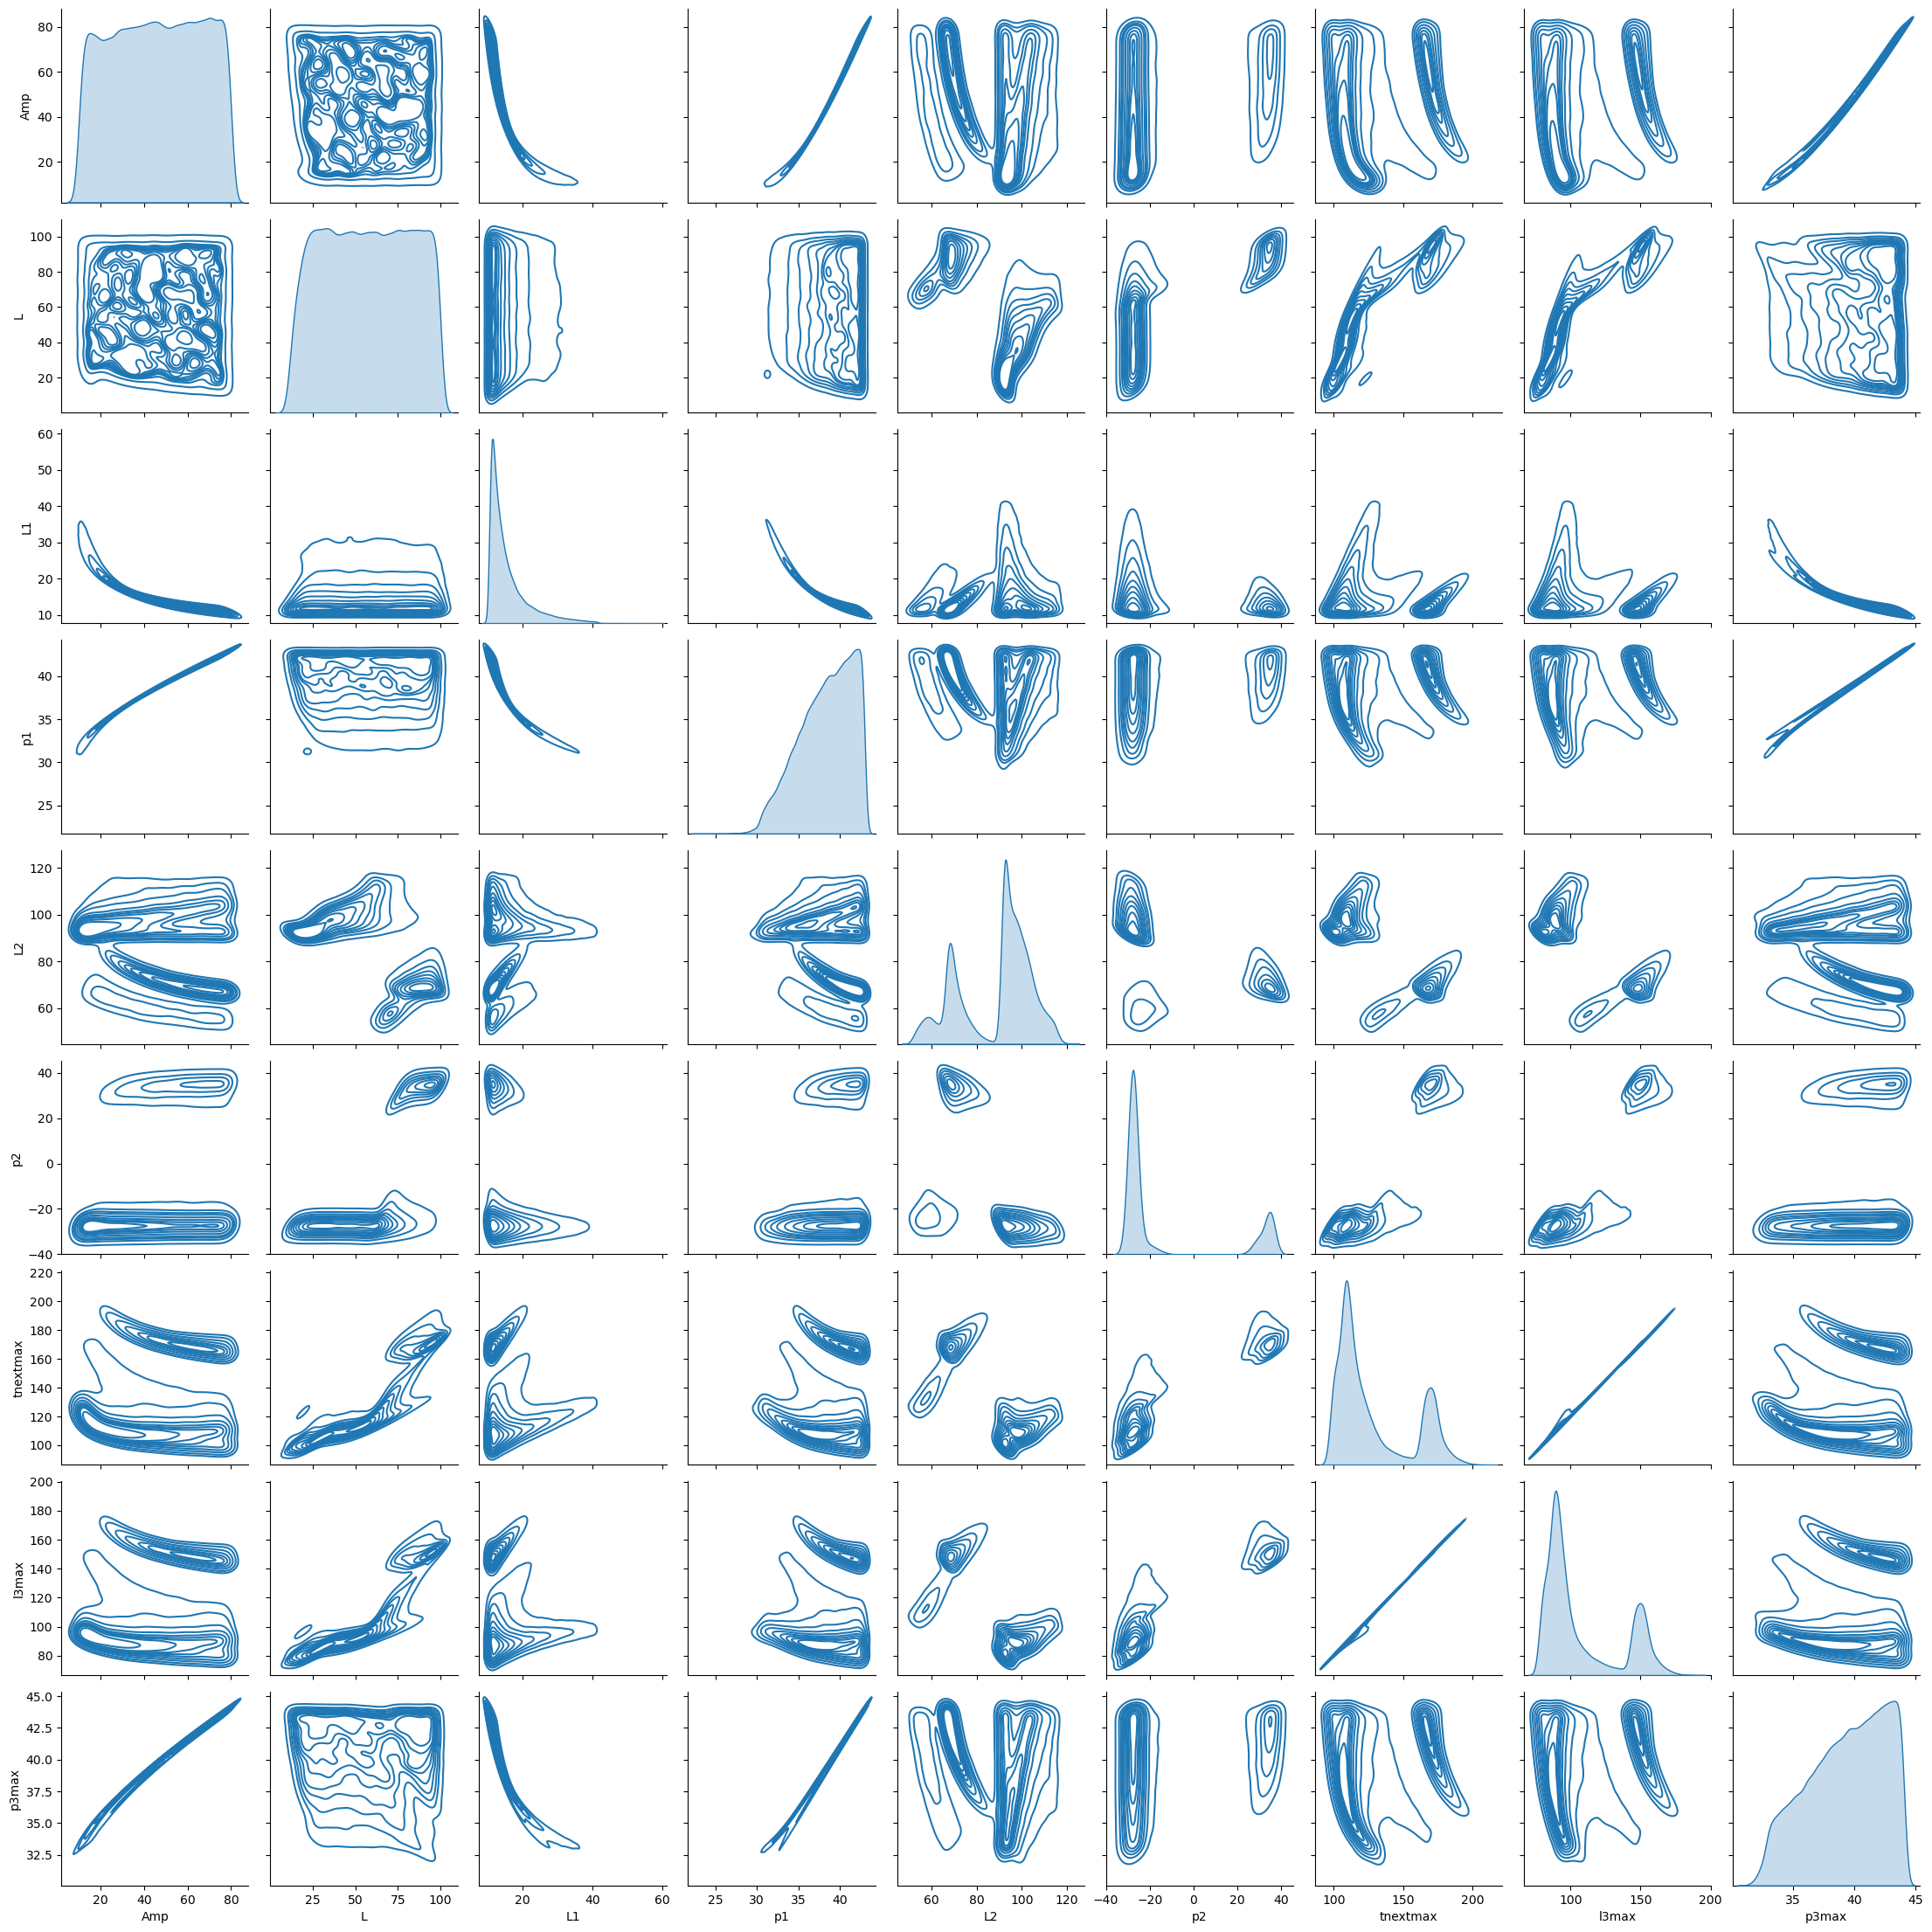

In [3]:
g2=sns.pairplot(df[cols], kind='kde')
g2.savefig("kde_full1.pdf", bbox_inches='tight')  # high quality PDF


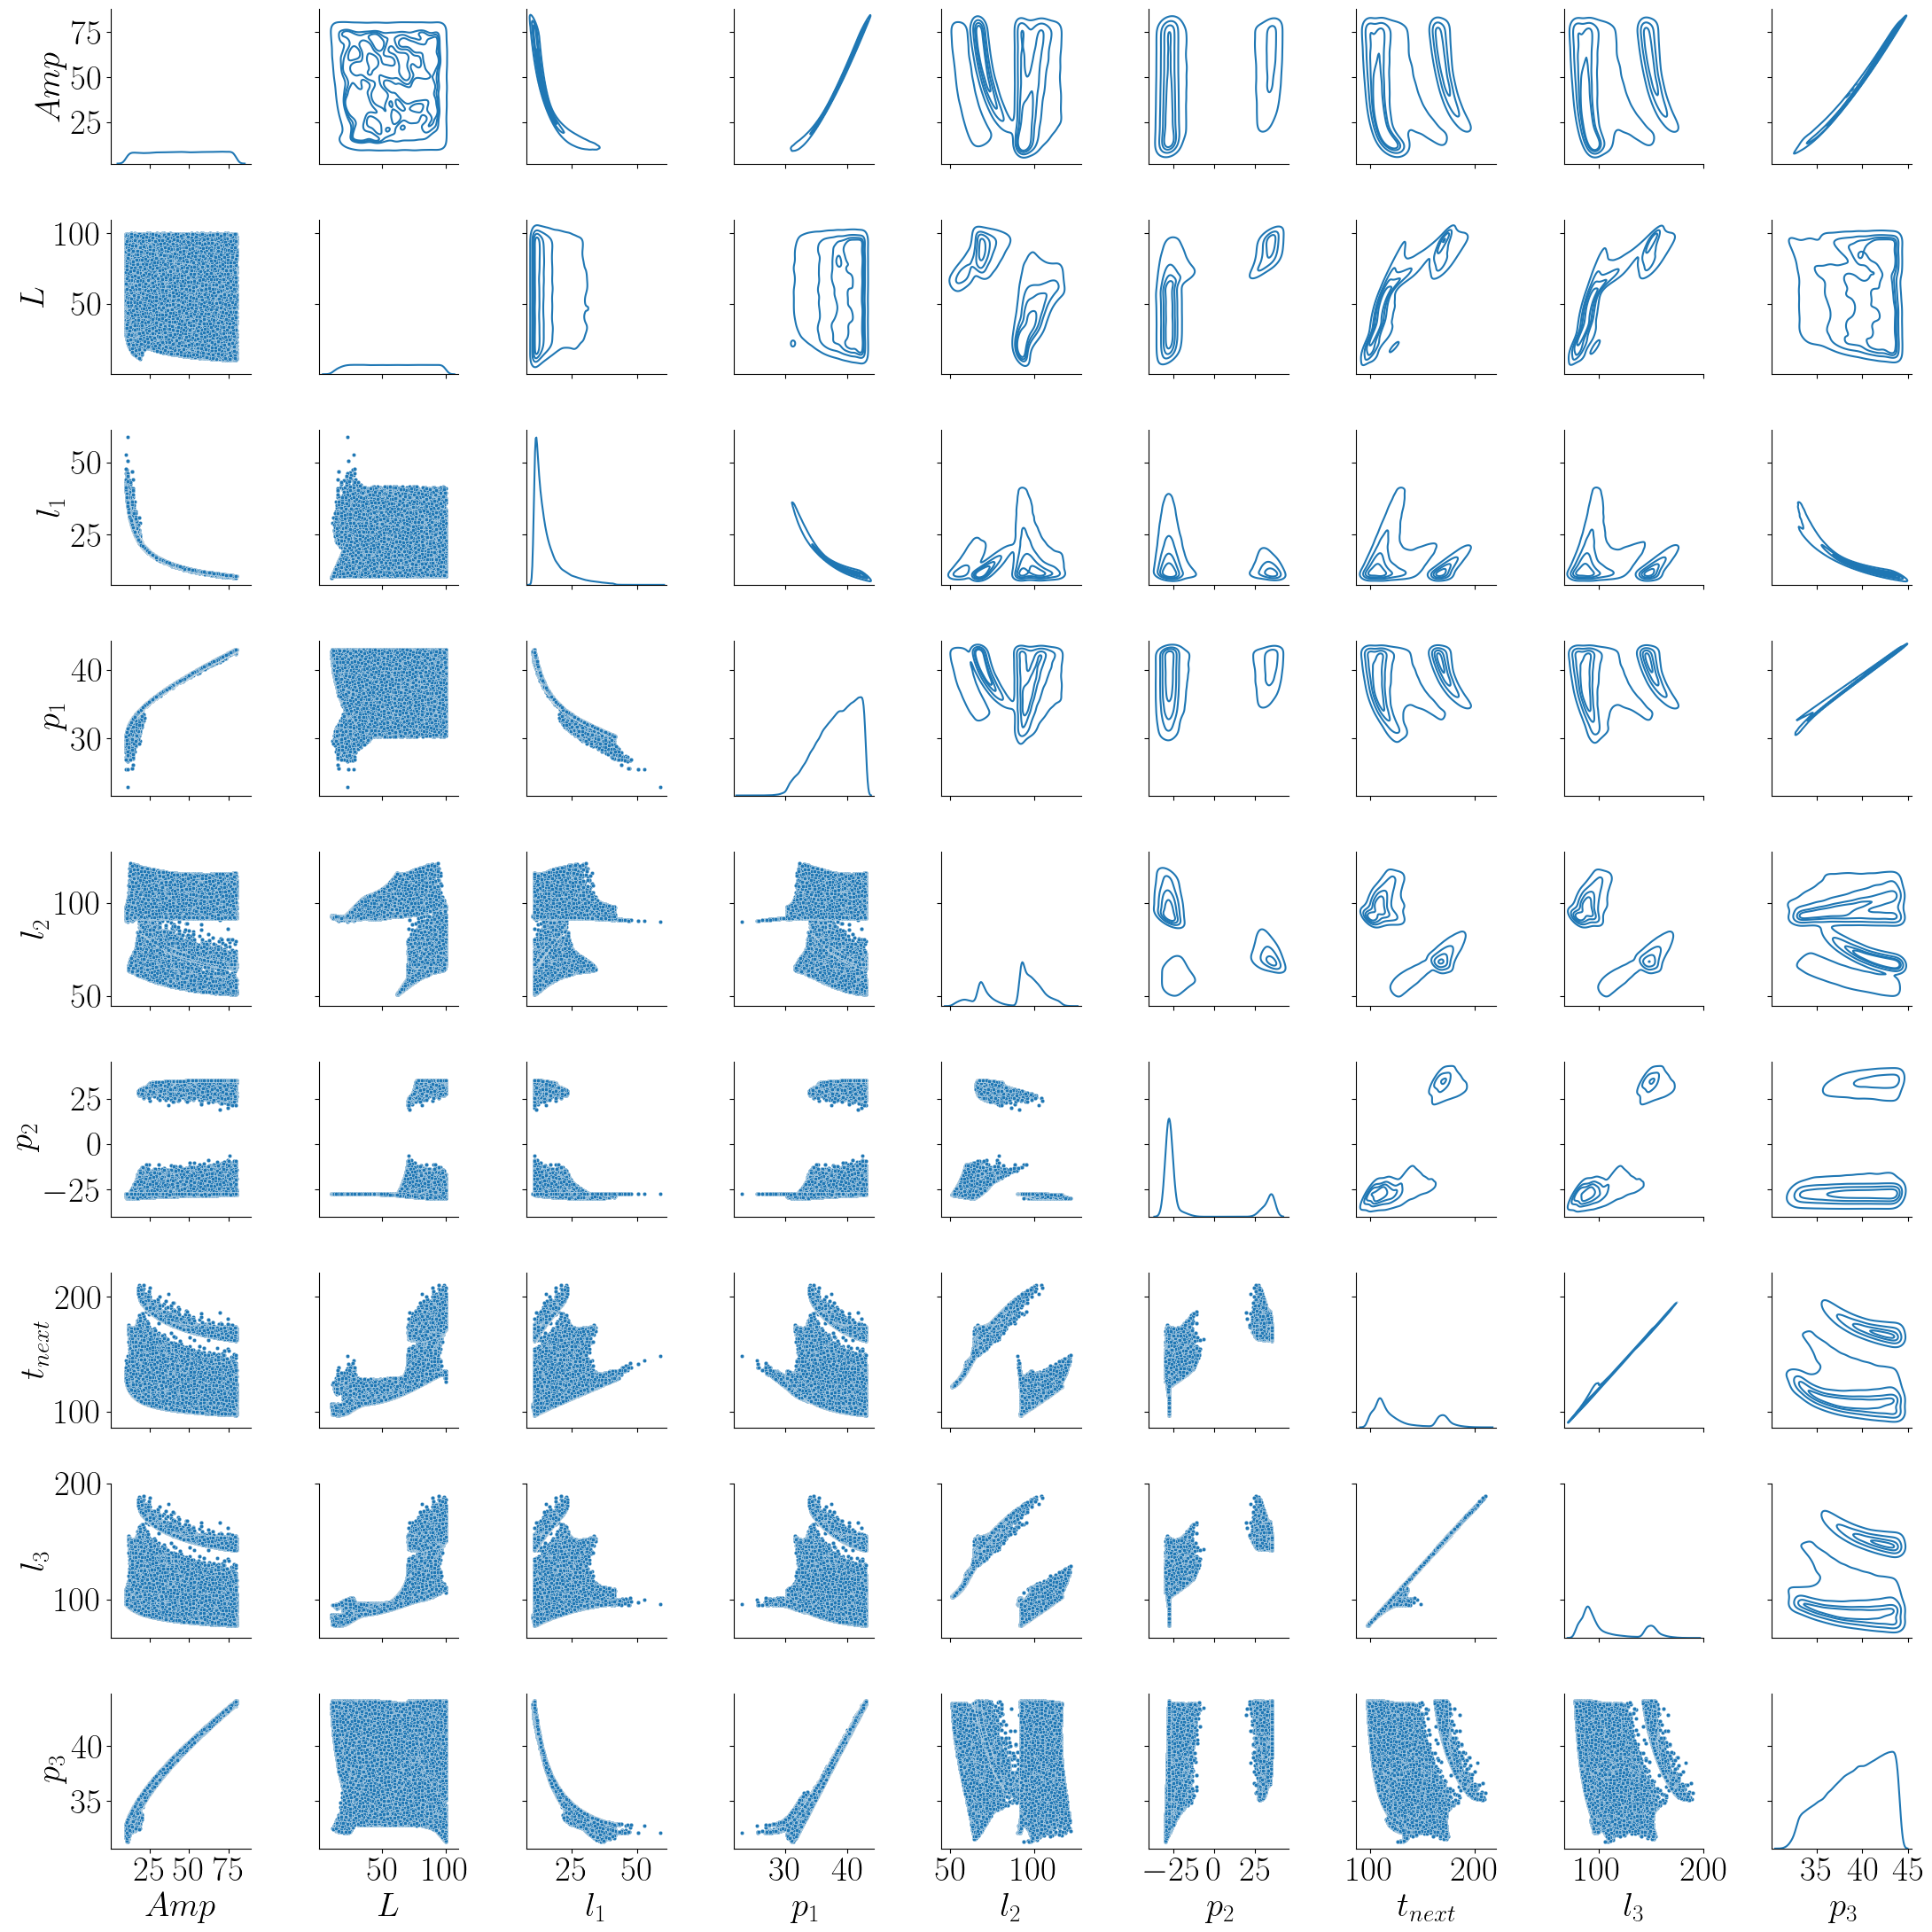

In [4]:
new_labels = [
    r'$Amp$',
    r'$L$',
    r'$l_1$',
    r'$p_1$',
    r'$l_2$',
    r'$p_2$',
    r'$t_{next}$',
    r'$l_3$',
    r'$p_3$'
]

# LaTeX-style fonts & bigger size
plt.rcParams.update({
    'text.usetex': True,
    'font.family': "serif",
    'font.serif': ['Computer Modern Roman'],
    'axes.formatter.use_mathtext': False,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.size': 30,           # <- set global font size
    'axes.titlesize': 30,
    'axes.labelsize': 28,
    'xtick.labelsize': 28,
    'ytick.labelsize': 28,
    'legend.fontsize': 28
})
single_color = "#1f77b4"  # Seaborn's default blue

# Create PairGrid
g13 = sns.PairGrid(df[cols])

# Lower: scatter
g13.map_lower(sns.scatterplot, s=10, color=single_color)

# Diagonal: univariate KDE
g13.map_diag(sns.kdeplot, fill=False, color=single_color,bw_adjust=1)

# Upper: 2D KDE
g13.map_upper(sns.kdeplot, fill=False, thresh=0.05, levels=5, color=single_color)

# Replace outer x and y labels with LaTeX
for i, row in enumerate(cols):
    for j, col in enumerate(cols):
        ax = g13.axes[i, j]
        if i == len(cols) - 1:
            ax.set_xlabel(new_labels[j])
        if j == 0:
            ax.set_ylabel(new_labels[i])
# Rescale diagonal KDE to peak at 1 (like pairplot)
for i in range(len(cols)):
    ax = g13.axes[i, i]
    lines = ax.get_lines()
    if lines:
        ymax = max(line.get_ydata().max() for line in lines)
        ax.set_ylim(0, ymax * 1.05)
# Adjust layout and save
plt.tight_layout()
g13.savefig("kde_scatter_grid4.pdf", bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Change font sizes for labels and titles
plt.rcParams.update({
    'font.size': 33,           # New global font size
    'axes.titlesize': 33,      # Title size
    'axes.labelsize': 31,      # Label size
    'xtick.labelsize': 31,     # X-tick label size
    'ytick.labelsize': 31,     # Y-tick label size
    'legend.fontsize': 31      # Legend font size
})

# Redraw the plot (it will use the new font size)
plt.draw()

# Or save the modified plot again
g13.savefig("kde_scatter_grid6_2.png", bbox_inches="tight")

# Display the plot
plt.show()


<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Assuming you already have g13 created and saved, now modify the ticks

# Reduce number of ticks on both x and y axes of the existing plot
for i in range(len(cols)):
    for j in range(len(cols)):
        ax = g13.axes[i, j]
        
        # Adjust number of ticks for both x and y axes
        ax.xaxis.set_major_locator(MaxNLocator(nbins=2))  # Adjust nbins as needed
        ax.yaxis.set_major_locator(MaxNLocator(nbins=2))  # Adjust nbins as needed

# Adjust layout to fit the new tick settings
plt.tight_layout()

# Save the modified plot with fewer ticks
g13.savefig("kde_scatter_grid6_adjusted_ticks2.png", bbox_inches="tight")

# Display the plot
plt.show()


<Figure size 640x480 with 0 Axes>